In [182]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
from matplotlib import cm
from matplotlib import colors as c
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
import seaborn as sns
import os

In [184]:
sns.set_style('white')

In [185]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample='mini_mocha') 
input_mass = meta['logM_total'][:]

In [186]:
input_mass = meta['logM_total'][:97]
log_sfr_1gyr = np.log10(meta['sfr_1gyr'][:97])
log_sfr_100myr = np.log10(meta['sfr_100myr'][:97])

/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [187]:
data_dir = os.path.join(os.environ.get('GQPMC'),'gqp_mc','doc','data_list','median_npy','emulator_30x')
f = os.listdir(data_dir)

In [188]:
data_dir2 = os.path.join(os.environ.get('GQPMC'),'gqp_mc','doc','data_list','median_npy','emulator_11x')
ff = os.listdir(data_dir2)

In [110]:
print(f)

['lgal.specphoto.noise_bgs0_legacy.emulator.sfr.npy', 'lgal.photo.noise_legacy.emulator.mcmc.npy', 'lgal.specphoto.noise_bgs0_legacy.emulator.mcmc.npy', 'lgal.photo.noise_legacy.emulator.sfr.npy']


In [129]:
print(ff)

['lgal.specphoto.noise_bgs0_legacy.emulator.sfr.npy', 'lgal.photo.noise_legacy.emulator.mcmc.npy', 'lgal.specphoto.noise_bgs0_legacy.emulator.mcmc.npy', 'lgal.photo.noise_legacy.emulator.sfr.npy']


In [111]:
specphoto_sfr = np.load(os.path.join(data_dir,f[0]),allow_pickle = True)[()]
photo_sfr = np.load(os.path.join(data_dir,f[3]),allow_pickle = True)[()]

In [132]:
specphoto11_sfr = np.load(os.path.join(data_dir2,ff[0]), allow_pickle = True)[()]
photo11_sfr = np.load(os.path.join(data_dir2,ff[3]),allow_pickle = True)[()]

In [131]:
keys = list(specphoto_sfr.keys())
specphoto_mstar = specphoto_sfr['logmstar']
specphoto_100myr = specphoto_sfr['logsfr.100myr']
specphoto_1gyr = specphoto_sfr['logsfr.1gyr']
photo_mstar = specphoto_sfr['logmstar']
photo_100myr = photo_sfr['logsfr.100myr']
photo_1gyr = photo_sfr['logsfr.1gyr']

In [135]:
specphoto11_mstar = specphoto11_sfr['logmstar']
specphoto11_100myr = specphoto11_sfr['logsfr.100myr']
specphoto11_1gyr = specphoto11_sfr['logsfr.1gyr']
photo11_mstar = photo11_sfr['logmstar']
photo11_100myr = photo11_sfr['logsfr.100myr']
photo11_1gyr = photo11_sfr['logsfr.1gyr']

In [113]:
mask = np.array(specphoto_mstar) != 'N/A'

In [114]:
print(specphoto_mstar)

[9.85988377518283, 10.786109072066777, 10.92256546598006, 10.098420577073878, 10.221005970275368, 10.524891622266692, 10.472136034888885, 10.574626813811792, 9.812960179621554, 10.862586603426957, 10.321900327165146, 10.680129675643984, 10.981230562301123, 10.219195524192822, 10.49899679271688, 11.175707285134507, 10.45112858953687, 10.077809023111127, 10.986600460156478, 'N/A', 9.713693709195908, 11.086958715967139, 9.93123992196521, 10.65082512581214, 9.826840583751032, 10.882307014021308, 10.525267306192013, 10.609498392447676, 11.14625642801403, 10.110070176567381, 11.00427846081654, 11.190222886793704, 10.880294233018, 'N/A', 10.152426593792285, 11.440438659538298, 10.435219642611905, 10.421083021528993, 11.056348840233833, 10.58469760222765, 10.873496799516015, 9.893175535269858, 11.889677988503667, 10.103020042669664, 9.958773447179537, 10.579346338408412, 11.042984844731011, 10.27198649163923, 10.57449081780323, 10.693433450797686, 10.46100032100565, 11.444043076734994, 10.3275

In [238]:
def plot(data1,data2,data3 = None, label = None,lim = False, label1= None, label2 = None, legend1 = '', legend2 = '', ax = None):
    mask = np.array(data1) != 'N/A'
    data1 = np.array(np.array(data1)[mask]).astype(float) #theta hat
    data2 = np.array(np.array(data2)[mask]).astype(float) #theta
    if ax:
        obj = ax
    else:
        obj = plt
        obj.figure(figsize = (5,5))
    obj.scatter(data2,data1, label = legend1, c = 'k', alpha = 0.5)
    if data3:
        data3 = np.array(np.array(data3)[mask]).astype(float)
        obj.scatter(data2,data3,label= legend2, c = 'steelblue', alpha = 0.5)#, s = 2)
    if (legend1 is not '') or (legend2 is not ''):
        obj.legend(fontsize = 15, frameon = False)
    
    obj.plot(lim,lim,c = 'r', lw = 1)
    if lim and ax:
        obj.set_xlim(lim)
        obj.set_ylim(lim)

    if lim and not ax:
        obj.xlim(lim)
        obj.ylim(lim)
        
    if label2 and ax:
        obj.set_xlabel(label2, fontsize = 15)
    if label2 and not ax:
        obj.xlabel(label2, fontsize = 15)
    if label2 and ax:
        obj.set_ylabel(label1, fontsize = 15)
    if label2 and not ax:
        obj.ylabel(label1, fontsize = 15)
    obj.grid()

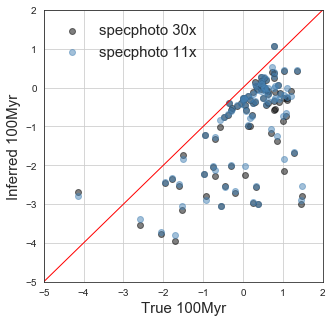

In [242]:
plot(specphoto_100myr,log_sfr_100myr,data3 = specphoto11_100myr, lim = (-5,2), label1 = 'Inferred 100Myr', label2 = 'True 100Myr', legend1 = 'specphoto 30x', legend2 = 'specphoto 11x')
plt.savefig('specphoto_30x_11x_log_sfr_100myr.pdf', format = 'pdf')

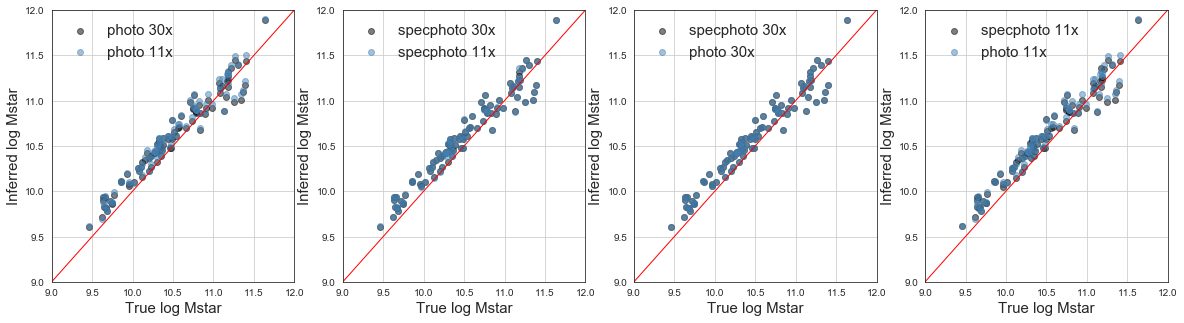

In [259]:
fig, axs = plt.subplots(1,4, figsize= (20,5))
plot(photo_mstar,input_mass,data3 = photo11_mstar,lim = (9,12), label1 = 'Inferred log Mstar', label2 = 'True log Mstar',legend1 = 'photo 30x', legend2 = 'photo 11x', ax = axs[0])
plot(specphoto_mstar,input_mass,data3 = specphoto11_mstar,lim = (9,12), label1 = 'Inferred log Mstar', label2 = 'True log Mstar',legend1 = 'specphoto 30x', legend2 = 'specphoto 11x', ax = axs[1])
plot(specphoto_mstar,input_mass,data3 = photo_mstar,lim = (9,12), label1 = 'Inferred log Mstar', label2 = 'True log Mstar',legend1 = 'specphoto 30x', legend2 = 'photo 30x', ax = axs[2])
plot(specphoto11_mstar,input_mass,data3 = photo11_mstar,lim = (9,12), label1 = 'Inferred log Mstar', label2 = 'True log Mstar',legend1 = 'specphoto 11x', legend2 = 'photo 11x', ax = axs[3])
plt.savefig('logmstar.pdf', format = 'pdf')

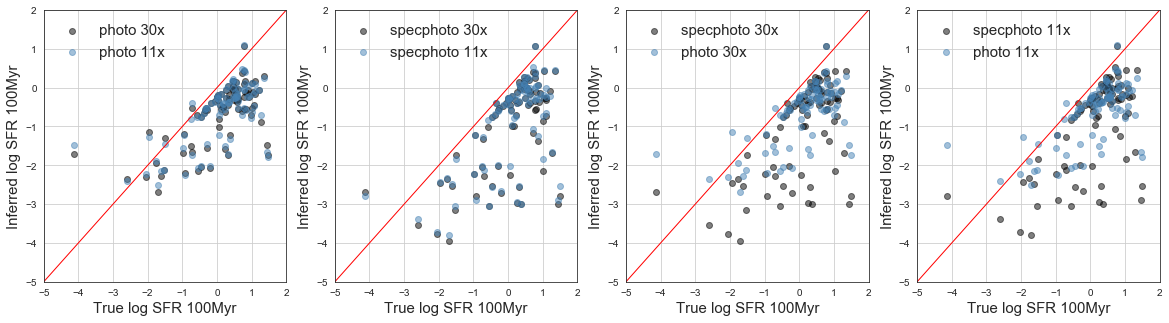

In [260]:
fig, axs = plt.subplots(1,4, figsize= (20,5))
plot(photo_100myr,log_sfr_100myr,data3 = photo11_100myr, lim = (-5,2), label1 = 'Inferred log SFR 100Myr', label2 = 'True log SFR 100Myr', legend1 = 'photo 30x', legend2 = 'photo 11x', ax = axs[0])
plot(specphoto_100myr,log_sfr_100myr,data3 = specphoto11_100myr, lim = (-5,2), label1 = 'Inferred log SFR 100Myr', label2 = 'True log SFR 100Myr', legend1 = 'specphoto 30x', legend2 = 'specphoto 11x', ax = axs[1])
plot(specphoto_100myr,log_sfr_100myr,data3 = photo_100myr, lim = (-5,2), label1 = 'Inferred log SFR 100Myr', label2 = 'True log SFR 100Myr', legend1 = 'specphoto 30x', legend2 = 'photo 30x', ax = axs[2])
plot(specphoto11_100myr,log_sfr_100myr,data3 = photo11_100myr, lim = (-5,2), label1 = 'Inferred log SFR 100Myr', label2 = 'True log SFR 100Myr', legend1 = 'specphoto 11x', legend2 = 'photo 11x', ax = axs[3])
plt.savefig('logsfr.100myr.pdf', format = 'pdf')

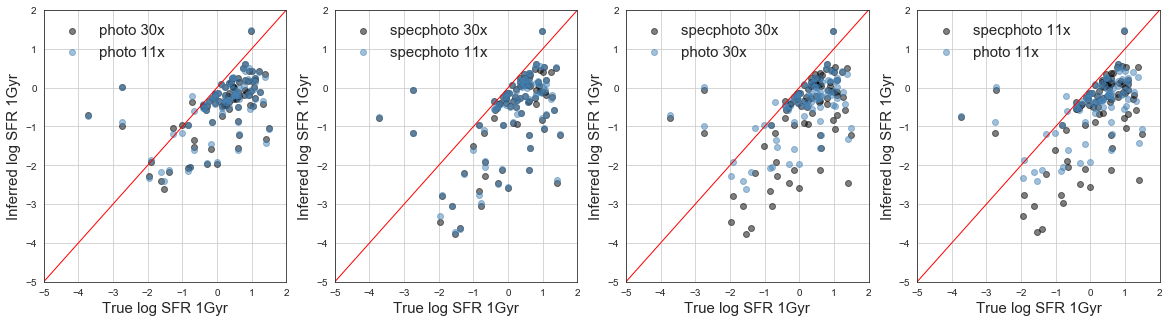

In [261]:
fig, axs = plt.subplots(1,4, figsize= (20,5))
plot(photo_1gyr,log_sfr_1gyr,data3 = photo11_1gyr, lim = (-5,2), label1 = 'Inferred log SFR 1Gyr', label2 = 'True log SFR 1Gyr', legend1 = 'photo 30x', legend2 = 'photo 11x', ax = axs[0])
plot(specphoto_1gyr,log_sfr_1gyr,data3 = specphoto11_1gyr, lim = (-5,2), label1 = 'Inferred log SFR 1Gyr', label2 = 'True log SFR 1Gyr', legend1 = 'specphoto 30x', legend2 = 'specphoto 11x', ax = axs[1])
plot(specphoto_1gyr,log_sfr_1gyr,data3 = photo_1gyr, lim = (-5,2), label1 = 'Inferred log SFR 1Gyr', label2 = 'True log SFR 1Gyr', legend1 = 'specphoto 30x', legend2 = 'photo 30x', ax = axs[2])
plot(specphoto11_1gyr,log_sfr_1gyr,data3 = photo11_1gyr, lim = (-5,2), label1 = 'Inferred log SFR 1Gyr', label2 = 'True log SFR 1Gyr', legend1 = 'specphoto 11x', legend2 = 'photo 11x', ax = axs[3])
plt.savefig('logsfr.1gyr.pdf', format = 'pdf')